In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/books.csv',error_bad_lines=False)
df.head()

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.shape

(11123, 12)

In [ ]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [ ]:
df.drop('bookID',axis=1,inplace=True)

Finding the top 10 books with highest rating

In [ ]:
df[['title','ratings_count']].sort_values('ratings_count',ascending=False).head(10)

,title,ratings_count
10336,Twilight (Twilight #1),4597666
1697,The Hobbit or There and Back Again,2530894
1462,The Catcher in the Rye,2457092
307,Angels & Demons (Robert Langdon #1),2418736
3,Harry Potter and the Prisoner of Azkaban (Harr...,2339585
4415,Harry Potter and the Chamber of Secrets (Harry...,2293963
1,Harry Potter and the Order of the Phoenix (Har...,2153167
23,The Fellowship of the Ring (The Lord of the Ri...,2128944
2114,Animal Farm,2111750
0,Harry Potter and the Half-Blood Prince (Harry ...,2095690


Converting the ratings into million

In [ ]:
df['num ratings in million']=round(df['ratings_count']/1000000,1).astype(str)+'M'

In [ ]:
df.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,num ratings in million
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2.1M
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2.2M
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,0.0M
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2.3M
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,0.0M


In [ ]:
df[['title','ratings_count','num ratings in million']].sort_values('ratings_count',ascending=False).head(10)

,title,ratings_count,num ratings in million
10336,Twilight (Twilight #1),4597666,4.6M
1697,The Hobbit or There and Back Again,2530894,2.5M
1462,The Catcher in the Rye,2457092,2.5M
307,Angels & Demons (Robert Langdon #1),2418736,2.4M
3,Harry Potter and the Prisoner of Azkaban (Harr...,2339585,2.3M
4415,Harry Potter and the Chamber of Secrets (Harry...,2293963,2.3M
1,Harry Potter and the Order of the Phoenix (Har...,2153167,2.2M
23,The Fellowship of the Ring (The Lord of the Ri...,2128944,2.1M
2114,Animal Farm,2111750,2.1M
0,Harry Potter and the Half-Blood Prince (Harry ...,2095690,2.1M


<Axes: title={'center': 'Top 10 Books with Highest ratings'}, xlabel='title'>

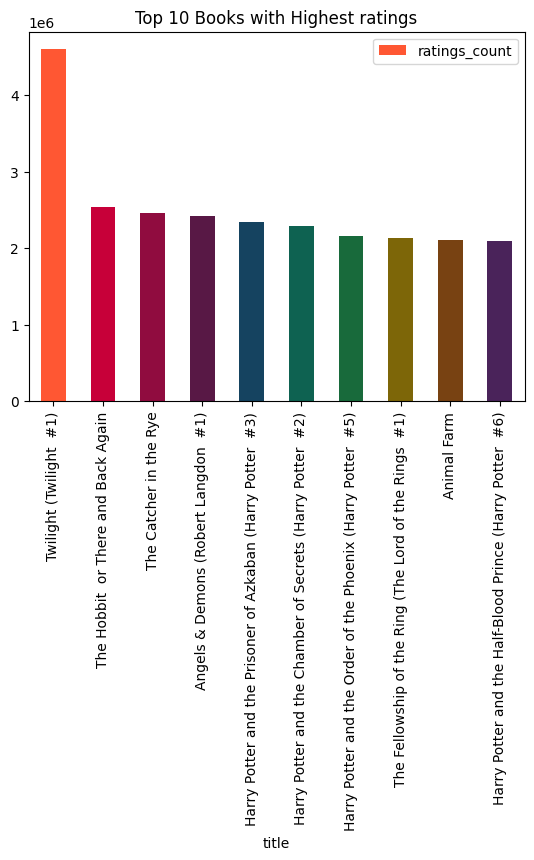

In [ ]:
colors=["#FF5733","#C70039","#900C3F","#581845","#154360","#0E6251","#186A3B","#7D6608","#784212","#4A235A"]
df[['title','ratings_count','num ratings in million']].sort_values('ratings_count',ascending=False).head(10).plot(x="title",y="ratings_count",kind="bar",color=colors,title="Top 10 Books with Highest ratings")

In [ ]:
# Finding the 10 books with lowest ratings

df[['title','ratings_count','num ratings in million']].sort_values('ratings_count').head(10)

,title,ratings_count,num ratings in million
9847,The American Campaign: U.S. Presidential Campa...,0,0.0M
7634,Your Child and Jesus: A Family Activity Book,0,0.0M
10917,The Leadership Challenge: Skills for Taking Ch...,0,0.0M
3492,Brodie's notes on Aldous Huxley's brave new world,0,0.0M
10442,After Collapse: The Regeneration of Complex So...,0,0.0M
2255,Animales No Se Visten Los (Animals Should Def...,0,0.0M
7573,The Berlin Phenomenology,0,0.0M
2758,Venac sonetnih venaca; Puževa srma,0,0.0M
526,Essentials of American and Texas Government: C...,0,0.0M
9063,La Ley del Exito,0,0.0M


In [ ]:
# Finding the top 10 books with highest average_rating

df[['title','average_rating']].sort_values('average_rating',ascending=False).head(10)

,title,average_rating
624,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,5.0
9893,His Princess Devotional: A Royal Encounter Wit...,5.0
4788,The Diamond Color Meditation: Color Pathway to...,5.0
9324,Tyrannosaurus Wrecks (Stanley #1),5.0
9720,The Irish Anatomist: A Study of Flann O'Brien,5.0
4933,Bulgakov's the Master and Margarita: The Text ...,5.0
6775,Delwau Duon: Peintiadau Nicholas Evans = Symph...,5.0
9282,Oliver Wendell Holmes in Paris: Medicine Theo...,5.0
786,Willem de Kooning: Late Paintings,5.0
4125,Zone of the Enders: The 2nd Runner Official St...,5.0


In [ ]:
# Finding the 10 books with lowest average rating

df[['title','average_rating']].sort_values("average_rating").head(10)

,title,average_rating
2533,Insights: Talks On The Nature Of Existence,0.0
9437,Classroom Interactions as Cross-Cultural Encou...,0.0
2532,How To Meditate: An Anthology Of Talks On Medi...,0.0
375,Juiced Official Strategy Guide,0.0
265,Out to Eat London 2002 (Lonely Planet Out to Eat),0.0
10138,Day and Night,0.0
7634,Your Child and Jesus: A Family Activity Book,0.0
11027,Anthony Thwaite: In Conversation With Peter Da...,0.0
6380,"Laguna I Love You: The Best of ""Our Town""",0.0
10917,The Leadership Challenge: Skills for Taking Ch...,0.0


In [ ]:
# Top 10 Authors with highest number of books they have made
df.groupby('authors')['title'].count().sort_values(ascending=False).head(10).reset_index().rename(columns={"authors":"Authors","title":"Number Of Books"})

,Authors,Number Of Books
0,Stephen King,40
1,P.G. Wodehouse,40
2,Rumiko Takahashi,39
3,Orson Scott Card,35
4,Agatha Christie,33
5,Piers Anthony,30
6,Mercedes Lackey,29
7,Sandra Brown,29
8,Dick Francis,28
9,Laurell K. Hamilton,23


<Axes: title={'center': 'Top 10 Authors with highest books published'}, xlabel='authors'>

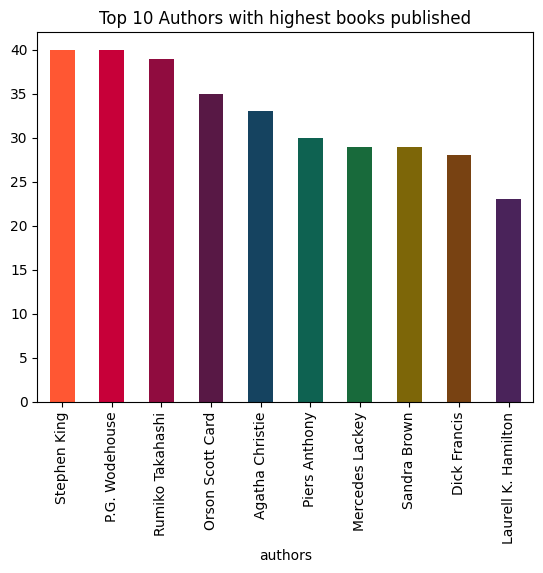

In [ ]:
df.groupby('authors')['title'].count().sort_values(ascending=False).head(10).plot(x="authors",kind="bar",color=colors,title="Top 10 Authors with highest books published")

In [ ]:
# Top 10 Authors based on highest number of books they've made with average rating

df.groupby('authors').agg({'title':"count","average_rating":"mean"}).sort_values('title',ascending=False).head(10)

,title,average_rating
authors,,
Stephen King,40,3.973500
P.G. Wodehouse,40,4.147250
Rumiko Takahashi,39,4.186667
Orson Scott Card,35,3.779143
Agatha Christie,33,3.989091
Piers Anthony,30,3.716667
Mercedes Lackey,29,4.039310
Sandra Brown,29,3.742069
Dick Francis,28,3.962143


In [ ]:
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

<Axes: title={'center': 'Top Language used in the Books'}, xlabel='Language'>

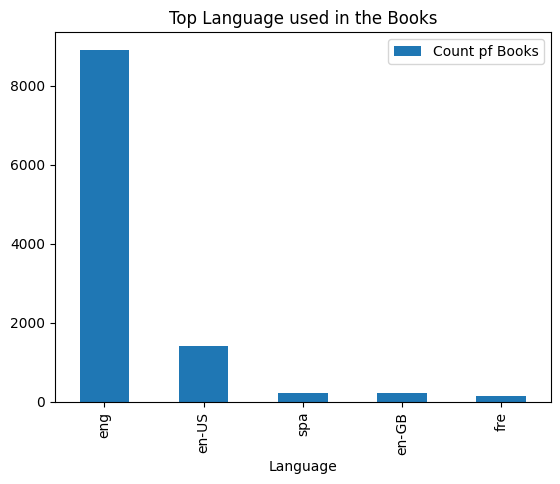

In [ ]:
# Top 5 languages used in the books

df.groupby('language_code')['title'].count().sort_values(ascending=False).head().reset_index().rename(columns=({'language_code':'Language','title':'Count pf Books'})).plot(x='Language',title='Top Language used in the Books',kind='bar')

In [ ]:
df['language_code'].value_counts()

eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

<Axes: title={'center': 'Top Publishers'}, xlabel='Publisher'>

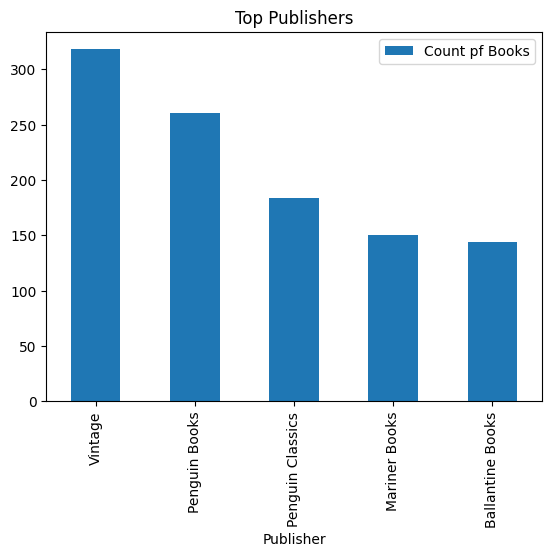

In [ ]:
# Top 5 Publisher used in the books

df.groupby('publisher')['title'].count().sort_values(ascending=False).head().reset_index().rename(columns=({'publisher':'Publisher','title':'Count pf Books'})).plot(x='Publisher',title='Top Publishers',kind='bar')